# RDS4 - Проект 4. Авиарейсы без потерь 

Цель проекта: Провести анализ авиарейсов из города Анапа в зимнее время за 2017 год и сделать вывод о том, от каких самых малоприбыльных рейсов мы можем отказаться.

Прибыльность рейса - это разница между доходом от продаж билетов и расходом на полет, соберите такой датасет, который позволит оценить эти цифры.

Самая простая модель оценки прибыльности: стоимость билетов - стоимость топлива на рейс (для оценки последнего вам необходим километраж рейса или длительность полета), но вы можете предложить другую модель.    
    
Задачи проекта:
1. Познакомиться с данными: изучить диаграмму схемы данных, посмотреть описание.  
2. Изучить закономерности в данных.
3. Сделать предварительный анализ.
4. С помощью кода SQL выгрузить из Metabase итоговый датасет(должен обязательно включать id рейса и города вылета     (Анапа) и прилета, модель самолёта и его характеристики, суммарную стоимость всех билетов на рейсе, 
   затраченное время в полёте и прочее).
5. Проанализировать данные из датасета о доходности каждого рейса и затратах на них.
6. Указать номера рейсов, которые предлагается убрать, а также предполагаемую прибыльность этих рейсов и среднюю      прибыльность всех рейсов.
8. Сформулировать выводы и подготовить презентацию.


In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
pd.set_option('display.max_rows', 20)  # показывать больше строк
pd.set_option('display.max_columns', 16)  # показывать больше колонок
df = pd.read_csv('Lossless_flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         127 non-null    int64  
 1   flight_no         127 non-null    object 
 2   model             127 non-null    object 
 3   fuel_cons         127 non-null    float64
 4   maintenance       127 non-null    int64  
 5   arrival_airport   127 non-null    object 
 6   actual_departure  127 non-null    object 
 7   duration          127 non-null    float64
 8   actual_arrival    127 non-null    object 
 9   month_n           127 non-null    float64
 10  fuel_price        127 non-null    int64  
 11  distance          127 non-null    float64
 12  economy           118 non-null    float64
 13  business          118 non-null    float64
 14  tickets_total     127 non-null    int64  
 15  revenue           118 non-null    float64
dtypes: float64(7), int64(4), object(5)
memory us

In [3]:
# Преобразуем столбцы с датами
df['actual_departure'] = pd.to_datetime(df['actual_departure'])
df['actual_arrival'] = pd.to_datetime(df['actual_arrival'])

# Переменные, которые содержит датасет:

flight_id - Идентификатор рейса

flight_no - Номер рейса, 

model - Модель самолета, 

fuel_cons - Удельный расход топлива  - кг/(пасс.* км), 

maintenance - Расходы на обслуживание 
(cредняя ставка за кресло-километр * вместимость самолета), 

actual_departure - Фактическое время вылета, 

arrival_airport - Аэропорт прибытия, 

duration - Длительность перелета, 

actual_arrival - Фактическое время прилета,

month_n - Месяц в числовой форме, 

fuel_price - Цена на топливо, в зависимости от месяца, 

distance - Расстояние до аэропорта прибытия, по координатам, 

fare - Класс обслуживания, 

fare_count - Количество билетов класса обслуживания,

tickets_total - Общее количество проданных билетов,

revenue - Доход

In [4]:
display(df)

,flight_id,flight_no,model,fuel_cons,maintenance,arrival_airport,actual_departure,duration,actual_arrival,month_n,fuel_price,distance,economy,business,tickets_total,revenue
0,136119,PG0252,Boeing 737-300,0.02250,520,SVO,2017-01-03 15:08:00+05:00,1.683333,2017-01-03 16:49:00+05:00,1.0,41435,1219.872758,102.0,11.0,113,1653000.0
1,136120,PG0252,Boeing 737-300,0.02250,520,SVO,2017-02-24 15:07:00+05:00,1.650000,2017-02-24 16:46:00+05:00,2.0,39553,1219.872758,98.0,11.0,109,1605400.0
2,136122,PG0252,Boeing 737-300,0.02250,520,SVO,2017-01-08 15:08:00+05:00,1.666667,2017-01-08 16:48:00+05:00,1.0,41435,1219.872758,87.0,10.0,97,1431000.0
3,136130,PG0252,Boeing 737-300,0.02250,520,SVO,2017-02-13 15:07:00+05:00,1.650000,2017-02-13 16:46:00+05:00,2.0,39553,1219.872758,97.0,10.0,107,1556600.0
4,136131,PG0252,Boeing 737-300,0.02250,520,SVO,2017-01-28 15:07:00+05:00,1.650000,2017-01-28 16:46:00+05:00,1.0,41435,1219.872758,112.0,12.0,124,1812800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,PG0480,Sukhoi Superjet-100,0.02346,679,EGO,2017-01-02 14:28:00+05:00,0.833333,2017-01-02 15:18:00+05:00,1.0,41435,629.860554,73.0,9.0,82,632400.0
123,136937,PG0480,Sukhoi Superjet-100,0.02346,679,EGO,2017-01-03 14:29:00+05:00,0.833333,2017-01-03 15:19:00+05:00,1.0,41435,629.860554,72.0,9.0,81,626100.0
124,136951,PG0480,Sukhoi Superjet-100,0.02346,679,EGO,2017-02-02 14:28:00+05:00,0.816667,2017-02-02 15:17:00+05:00,2.0,39553,629.860554,78.0,12.0,90,720600.0
125,136953,PG0480,Sukhoi Superjet-100,0.02346,679,EGO,2017-02-27 14:27:00+05:00,0.833333,2017-02-27 15:17:00+05:00,2.0,39553,629.860554,85.0,12.0,97,765300.0


# Функции обработки столбцов

In [5]:
# Функция проверки на выбросы
def outliers(df, col):
    # Межквартильный размах
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    range_s = df[col].min()  # Границы столбца
    range_e = df[col].max()

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    df[col].loc[df[col].between(
        perc25 - 1.5*IQR,
        perc75 + 1.5*IQR)].hist(bins=16, range=(range_s, range_e), label='В границах выбросов')

    df[col].hist(
        alpha=0.9, bins=16, range=(range_s, range_e), label='Все значения')

    df[col].loc[(df[col] >= (perc25 - 1.5*IQR)) & (df[col] <= (perc75 + 1.5*IQR))].hist(
        alpha=0.3, bins=16, range=(range_s, range_e), label='Без выбросов')

    plt.legend()
    print('Процентное соотношение значений столбца {}'.format(col))
    display(df[col].value_counts(normalize=True))

#  Функция подсчета уникальных значений и процент пустых значений


def uniq_nan(df, col):
    print("Всего значений {}:" .format(col), df[col].count())
    print("Уникальных значений {}:" .format(col), df[col].nunique())
    print("Пустых значений {}:" .format(col),
          "{:.1%}" .format(df[col].isnull().sum()/len(df)))


def get_boxplot(df, col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='profit',
                data=df.loc[df.loc[:, col].isin(
                    df.loc[:, col].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()

In [6]:
# Обработка NAN
# Посмотрим, сколько пропусков в каждом столбце
df.isna().sum()

flight_id           0
flight_no           0
model               0
fuel_cons           0
maintenance         0
arrival_airport     0
actual_departure    0
duration            0
actual_arrival      0
month_n             0
fuel_price          0
distance            0
economy             9
business            9
tickets_total       0
revenue             9
dtype: int64

In [7]:
# Поиск пропусков
df[df['revenue'].isna()]

,flight_id,flight_no,model,fuel_cons,maintenance,arrival_airport,actual_departure,duration,actual_arrival,month_n,fuel_price,distance,economy,business,tickets_total,revenue
59,136511,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-02-21 11:15:00+05:00,5.166667,2017-02-21 16:25:00+05:00,2.0,39553,3634.018122,NaN,NaN,0,NaN
60,136513,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-02-28 11:13:00+05:00,5.166667,2017-02-28 16:23:00+05:00,2.0,39553,3634.018122,NaN,NaN,0,NaN
61,136514,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-02-07 11:14:00+05:00,4.983333,2017-02-07 16:13:00+05:00,2.0,39553,3634.018122,NaN,NaN,0,NaN
62,136523,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-01-10 11:14:00+05:00,5.200000,2017-01-10 16:26:00+05:00,1.0,41435,3634.018122,NaN,NaN,0,NaN
63,136540,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-01-17 11:14:00+05:00,5.116667,2017-01-17 16:21:00+05:00,1.0,41435,3634.018122,NaN,NaN,0,NaN
64,136544,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-01-31 11:10:00+05:00,5.066667,2017-01-31 16:14:00+05:00,1.0,41435,3634.018122,NaN,NaN,0,NaN
65,136546,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-01-03 11:13:00+05:00,5.033333,2017-01-03 16:15:00+05:00,1.0,41435,3634.018122,NaN,NaN,0,NaN
66,136560,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-01-24 11:13:00+05:00,5.083333,2017-01-24 16:18:00+05:00,1.0,41435,3634.018122,NaN,NaN,0,NaN
67,136567,PG0194,Boeing 737-300,0.0225,520,NOZ,2017-02-14 11:12:00+05:00,5.183333,2017-02-14 16:23:00+05:00,2.0,39553,3634.018122,NaN,NaN,0,NaN


Данных по Новокузнецку в базе нет, поэтому следует отказаться от анализа рейсов в Новокузнецк.
Лишние строки удалим

In [8]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   flight_id         118 non-null    int64                                
 1   flight_no         118 non-null    object                               
 2   model             118 non-null    object                               
 3   fuel_cons         118 non-null    float64                              
 4   maintenance       118 non-null    int64                                
 5   arrival_airport   118 non-null    object                               
 6   actual_departure  118 non-null    datetime64[ns, pytz.FixedOffset(300)]
 7   duration          118 non-null    float64                              
 8   actual_arrival    118 non-null    datetime64[ns, pytz.FixedOffset(300)]
 9   month_n           118 non-null    float64  

In [9]:
# Добавим новые признаки

In [10]:
# Расходы на топливо
df['fuel_cost'] = round(df.fuel_cons*df.fuel_price /
                        1000*df.distance*df.tickets_total*24.9/100)

In [11]:
# Расходы на обслуживание
df['maint_cost'] = round(df.maintenance*df.distance)

In [12]:
# Прибыль 
df['profit'] = df['revenue'] - df['fuel_cost'] - df['maint_cost']

In [13]:
df.head(5)

,flight_id,flight_no,model,fuel_cons,maintenance,arrival_airport,actual_departure,duration,...,distance,economy,business,tickets_total,revenue,fuel_cost,maint_cost,profit
0,136119,PG0252,Boeing 737-300,0.0225,520,SVO,2017-01-03 15:08:00+05:00,1.683333,...,1219.872758,102.0,11.0,113,1653000.0,31999.0,634334.0,986667.0
1,136120,PG0252,Boeing 737-300,0.0225,520,SVO,2017-02-24 15:07:00+05:00,1.650000,...,1219.872758,98.0,11.0,109,1605400.0,29465.0,634334.0,941601.0
2,136122,PG0252,Boeing 737-300,0.0225,520,SVO,2017-01-08 15:08:00+05:00,1.666667,...,1219.872758,87.0,10.0,97,1431000.0,27469.0,634334.0,769197.0
3,136130,PG0252,Boeing 737-300,0.0225,520,SVO,2017-02-13 15:07:00+05:00,1.650000,...,1219.872758,97.0,10.0,107,1556600.0,28924.0,634334.0,893342.0
4,136131,PG0252,Boeing 737-300,0.0225,520,SVO,2017-01-28 15:07:00+05:00,1.650000,...,1219.872758,112.0,12.0,124,1812800.0,35114.0,634334.0,1143352.0


# Корреляционный анализ

<AxesSubplot:>

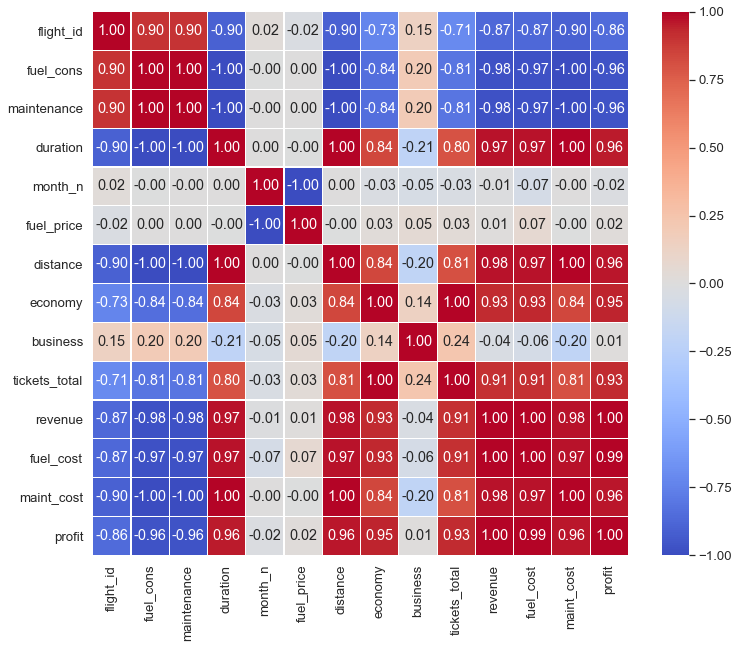

In [14]:
#sns.heatmap(df.corr(), annot=True)

# Тепловая карта
sns.set(font_scale=1.2)
plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f',
            linewidths=0.1, cmap="coolwarm")

Есть обратная зависимость целевой переменная 'profif', от расходов на топливо и прямая зависимость от длительности полета, расстояния и количества проданных билетов.
Причем большую роль играет количество проданных билетов эконом класса.

# Зависимость прибыли от месяца и рейса 

25-й перцентиль: 304826.75, 75-й перцентиль: 961224.75, IQR: 656398.0,  Границы выбросов: [-679770.25, 1945821.75].
Процентное соотношение значений столбца profit


323509.0     0.076271
322837.0     0.059322
316689.0     0.050847
310542.0     0.025424
305045.0     0.016949
               ...   
828849.0     0.008475
794845.0     0.008475
986667.0     0.008475
1168265.0    0.008475
304394.0     0.008475
Name: profit, Length: 92, dtype: float64

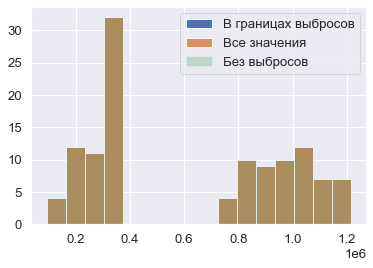

In [15]:
# Распределение целевой переменной
outliers(df, 'profit')

Прибыль на рейсах до Москвы распределена более равномерно

Text(0.5, 1.0, 'Прибыль по рейсам и по месяцам')

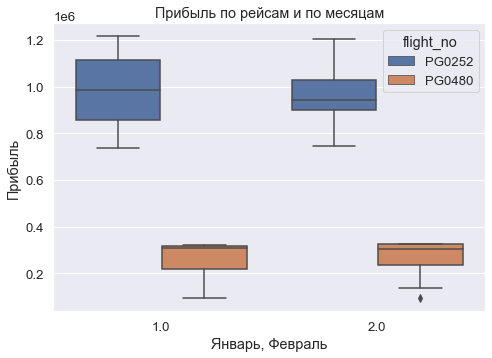

In [16]:
# Прибыль по рейсам и по месяцам
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.boxplot(x="month_n", y="profit", hue="flight_no",
            data=df)
ax.set_xlabel('Январь, Февраль')
ax.set_ylabel('Прибыль')
ax.set_title('Прибыль по рейсам и по месяцам')

In [17]:
# Имеет смысл выделить два датасета:
# Москва
svo = df[df.arrival_airport == "SVO"]
svo = svo.sort_values('actual_departure')
# Белгород
ego = df[df.arrival_airport == "EGO"]
ego = ego.sort_values('actual_departure')

In [18]:
k = round(svo.profit.mean()/ego.profit.mean(), 1)
print('В среднем рейсы в Москву прибыльнее,чем в Белгород в {}' .format(k),
      'раза')

В среднем рейсы в Москву прибыльнее,чем в Белгород в 3.6 раза


In [19]:
# Посмотрим на выбросы по прибыли на рейсах в Белгород в феврале
PG0480_2 = df[(df.flight_no == 'PG0480') & (df.month_n ==2) ].copy()

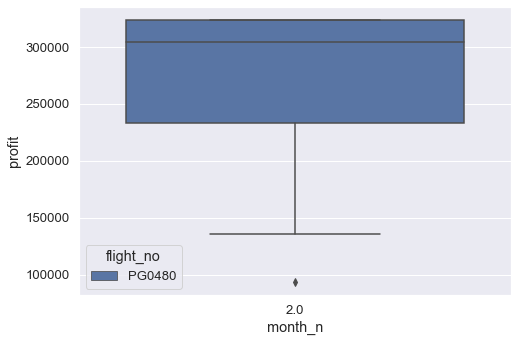

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.boxplot(x="month_n", y="profit", hue="flight_no",
            data=PG0480_2)

25-й перцентиль: 233614.0, 75-й перцентиль: 323509.0, IQR: 89895.0,  Границы выбросов: [98771.5, 458351.5].
Процентное соотношение значений столбца profit


323509.0    0.321429
305045.0    0.071429
304754.0    0.071429
317354.0    0.071429
186928.0    0.035714
280427.0    0.035714
274273.0    0.035714
248764.0    0.035714
279827.0    0.035714
255518.0    0.035714
135928.0    0.035714
181374.0    0.035714
93429.0     0.035714
174328.0    0.035714
169065.0    0.035714
224164.0    0.035714
236764.0    0.035714
Name: profit, dtype: float64

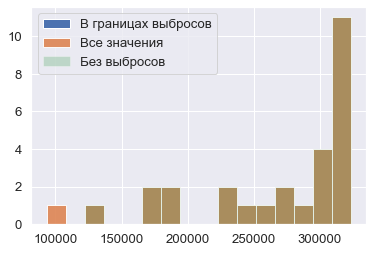

In [21]:
outliers(PG0480_2, 'profit')

Прибыль менее 98771.5 считается выбросом

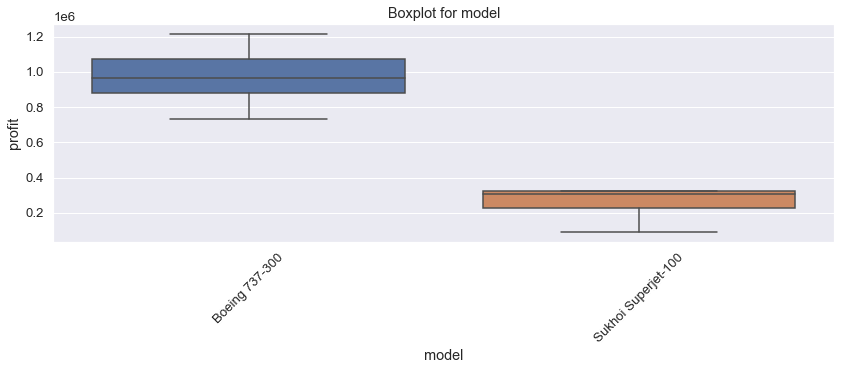

In [22]:
# Зависимость прибыли от модели самолета
get_boxplot(df, 'model')

Поскольку разные самолеты задействованы на разных рейсах нельзя однозначно сказать что рейсы выполняемые Боингами прибыльнее Суперджетов


Распределение средней прибыли по дням недели

<AxesSubplot:xlabel='day', ylabel='profit'>

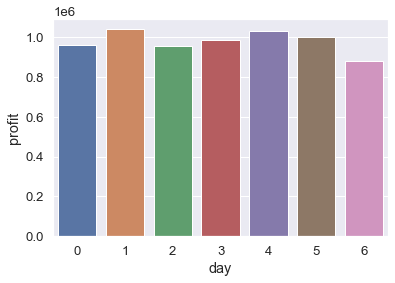

In [23]:
# Москва
by_day_svo = pd.DataFrame(round(svo.groupby(svo['actual_arrival'].dt.weekday)[
                   'profit'].mean(), 2))
by_day_svo['day'] = [0,1,2,3,4,5,6]

sns.barplot(x='day', y='profit', data=by_day_svo)

Максимальная средняя прибыль по вторникам, минимальная по воскресеньям

<AxesSubplot:xlabel='day', ylabel='profit'>

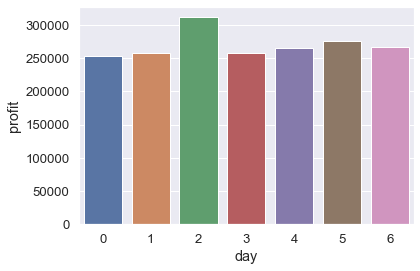

In [24]:
# Белгород
by_day_ego = pd.DataFrame(round(ego.groupby(ego['actual_arrival'].dt.weekday)[
                   'profit'].mean(), 2))
by_day_ego['day'] = [0,1,2,3,4,5,6]
sns.barplot(x='day', y='profit', data=by_day_ego)

Максимальная средняя прибыль по средам, минимальная по понедельникам

## Определим малоприбыльные рейсы

In [25]:
# Москва
low_profit_svo = svo[['flight_id', 'month_n',
                      'tickets_total', 'revenue', 'profit']].copy()

quantile = low_profit_svo.profit.quantile(q=0.05)
lpsvo=low_profit_svo[low_profit_svo.profit < quantile].sort_values(
    by='profit', ascending=False)
lpsvo

,flight_id,month_n,tickets_total,revenue,profit
2,136122,1.0,97,1431000.0,769197.0
21,136250,2.0,99,1407800.0,746704.0
54,136464,1.0,100,1398000.0,735348.0


<AxesSubplot:xlabel='flight_id', ylabel='profit'>

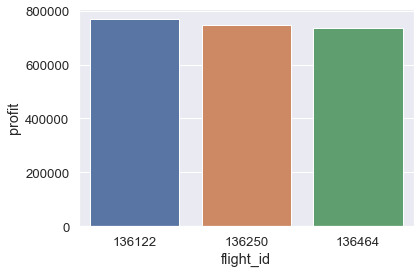

In [26]:
sns.barplot(x='flight_id', y='profit', data=lpsvo)


In [27]:
# Белгород
low_profit_ego = ego[['flight_id', 'month_n',
                         'tickets_total', 'revenue', 'profit']].copy()

quantile = low_profit_ego.profit.quantile(q=0.05)
lpego=low_profit_ego[low_profit_ego.profit < quantile].sort_values(
    by='profit', ascending=False)
lpego

,flight_id,month_n,tickets_total,revenue,profit
109,136844,2.0,79,575100.0,135928.0
77,136642,1.0,64,531000.0,93568.0
102,136807,2.0,68,531000.0,93429.0


<AxesSubplot:xlabel='flight_id', ylabel='profit'>

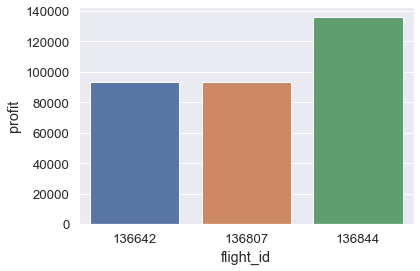

In [28]:
sns.barplot(x='flight_id', y='profit', data=lpego)

# Вывод

In [29]:
# Я бы предложил отказаться от следующих рейсов в Москву: 
lpsvo['flight_id']
    

2     136122
21    136250
54    136464
Name: flight_id, dtype: int64

In [30]:
# Средняя прибыль малоприбыльных рейсов в Москву
round(lpsvo['profit'].mean(),2)

750416.33

In [31]:
# Средняя прибыль всех рейсов в Москву
round(svo['profit'].mean(),2)

976894.44

In [32]:
# и от таких рейсов в Белгород:
lpego['flight_id'] 

109    136844
77     136642
102    136807
Name: flight_id, dtype: int64

In [33]:
# Средняя прибыль малоприбыльных рейсов в Белгород
round(lpego['profit'].mean(),2)

107641.67

In [34]:
# Средняя прибыль всех рейсов Белгород
round(ego['profit'].mean(),2)

269307.29